In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skipper import observe

import sys
sys.path.append('../scripts/')
import our_pointings
import sigjson_s2023a

In [3]:
halpha_pointings, oiii_pointings =  our_pointings.load_springfields()

In [4]:
#oiii_nights = obsdates[obsfilters == 'N540', :-1]
#halpha_nights = obsdates[obsfilters=='N708',:-1]

tele_fname = '/Users/kadofong/Downloads/tele20221004.csv'
copilot_fname = '/Users/kadofong/Downloads/db_merian.fits'

coo_h = observe.CopilotOutput ( copilot_fname, oiii_pointings )
coo_h = observe.CopilotOutput ( copilot_fname, halpha_pointings )

In [5]:
fields = oiii_pointings['object'].str.extract(r'(.*?(?=_))')[0]

In [6]:
np.in1d(coo_h.merian_sidecar['object'], halpha_pointings.index).all()

True

# Check Moon

In [7]:
import importlib
importlib.reload(sigjson_s2023a)

obsdates = sigjson_s2023a.obsdates
obsfilters = sigjson_s2023a.obsfilters

In [8]:
ctio = observe.ObservingSite ()

In [9]:
moonarr = np.zeros([len(obsdates),2])
for idx in range(len(moonarr)):
    year, month, day = obsdates[idx][:3]
    slot = obsdates[idx,-2]
    night_start, night_end = ctio.get_sunriseset ( year, month, day, cut_at_contract=False )
    midpoint = night_start + 0.5*(night_end-night_start)
    if slot == 0:
        print('[predict] night slot: Full night')
        obs_start = night_start
        obs_end = night_end
    elif slot == 1:
        print('[predict] night slot: First half')
        obs_start = night_start
        obs_end = midpoint
    elif slot==2:
        print('[predict] night slot: Second half')
        obs_start = midpoint
        obs_end = night_end 
    elif slot==3:
        print('[predict] night slot: Second 3/4')
        obs_start = night_start + 0.5*(midpoint - night_start)
        obs_end = night_end
    elif slot==4:
        if extra == 1:
            s = ''
        else:
            s = 's'
        print (f'[predict] night slot: Second half and the last {extra} hour{s} of the first half')
        obs_start = midpoint - datetime.timedelta(hours=extra)
        obs_end = night_end
    moon_cillum, moon_altreport = ctio.track_moon ( obs_start, obs_end )
    moonarr[idx] = (moon_cillum, moon_altreport)

[predict] night slot: Full night
[predict] night slot: First half
[predict] night slot: Full night
[predict] night slot: Full night
[predict] night slot: Full night
[predict] night slot: First half
[predict] night slot: Full night
[predict] night slot: Full night
[predict] night slot: First half
[predict] night slot: First half
[predict] night slot: First half
[predict] night slot: First half
[predict] night slot: First half
[predict] night slot: First half
[predict] night slot: First half
[predict] night slot: First half
[predict] night slot: First half
[predict] night slot: First half
[predict] night slot: First half
[predict] night slot: First half
[predict] night slot: First half
[predict] night slot: First half
[predict] night slot: First half
[predict] night slot: First half
[predict] night slot: First half
[predict] night slot: First half
[predict] night slot: First half
[predict] night slot: First half
[predict] night slot: First half


In [10]:
indices = obsdates[:,1]*100+obsdates[:,2]

In [11]:
mooneff = np.where(moonarr[:,1]>0, moonarr[:,0], 0.)

In [16]:
obsdates[:,1]

array([3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5,
       5, 5, 5, 5, 5, 5, 5])

In [20]:
mask = obsdates[:,1]==5

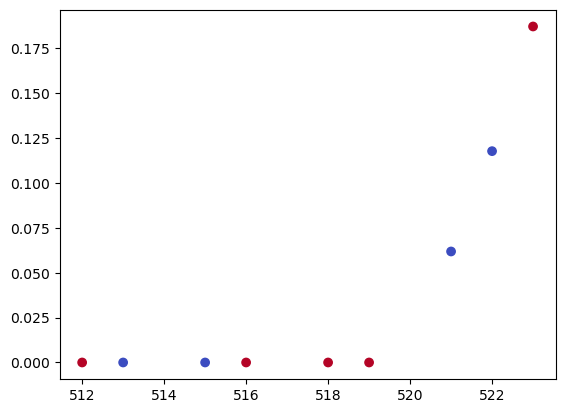

In [21]:
plt.scatter (indices[mask], mooneff[mask], c=obsfilters[mask]=='N540', cmap='coolwarm' )

In [13]:
for idx in range(len(obsdates)):
    night = obsdates[idx]
    
    is_queued = sigjson_s2023a.plan_tomorrow( night[2], night[1], night[0], 
                                             tele_fname, 
                                             copilot_fname, 
                                             slot = night[3],
                                             mfilt=obsfilters[idx], 
                                             is_queued=None, 
                                             pad_last_hour=False, 
                                             maxairmass=1.8, 
                                             save=False, 
                                             verbose=False,
                                             dryrun=True)
    break

DAY:       17
MONTH:     3
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1185526, taken at 2023-03-19 04:32:21.125334+00:00
On 2023/3/17, we are observing None in N540
We are observing the full of the night
11 pointings in this catalog need reobservation!


[predict] night slot: Full night
Moon illumination is: 0.17
Moon max altitude during observation is: 30.26


# Assume "Perfect" (no overheads, no weather) performance

In [65]:
is_march = obsdates[:,1] == 3
dates_oiii = obsdates[(obsfilters=='N540')]
dates_halpha= obsdates[(obsfilters=='N708')]

In [62]:
is_queued = None
for idx in range(len(dates_oiii)):
    night = dates_oiii[idx]
    is_queued = sigjson_s2023a.plan_tomorrow( night[2], night[1], night[0], 
                                             tele_fname, 
                                             copilot_fname, 
                                             slot = night[3],
                                             mfilt='N540', 
                                             is_queued=is_queued, 
                                             pad_last_hour=False, 
                                             maxairmass=1.8, 
                                             save=False, 
                                             verbose=False)
to_obs_oiii = is_queued.loc[~is_queued['qstamp'].isna()]

DAY:       17
MONTH:     3
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1185526, taken at 2023-03-19 04:32:21.125334+00:00
On 2023/3/17, we are observing None in N540
We are observing the full of the night
11 pointings in this catalog need reobservation!


[predict] night slot: Full night
Moon illumination is: 0.17
Moon max altitude during observation is: 30.26

(Minimum airmass available: 1.278232602835533)
==> 20230318_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.202672559382374)
==> 20230318_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.2056054920815278)
==> 20230318_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1540055094632014)
==> 20230318_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1497743151168667)
==> 20230318_04, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1435802882077337)
==> 20230318_05, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1432654451057245)
==> 20230318_06, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.145

[predict] night slot: First half
Moon illumination is: 0.10
Moon max altitude during observation is: 0.00

(Minimum airmass available: 1.482798887437903)
(120s) Not enough time for an exposure. Skipping...

(Minimum airmass available: 1.2864449808661946)
==> 20230319_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.2157805735914056)
==> 20230319_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.2077714393148578)
==> 20230319_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1614725093841856)
==> 20230319_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.155101716603165)
==> 20230319_04, 3060.000000000014s available
2700.0s filled by priority=inf objects
DAY:       20
MONTH:     3
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1185526, taken at 2023-03-19 04:32:21.125334+00:00
On 2023/3/20, we are observ

[predict] night slot: Full night
Moon illumination is: 0.01
Moon max altitude during observation is: 0.00

(Minimum airmass available: 1.5063640847354822)
(240s) Not enough time for an exposure. Skipping...

(Minimum airmass available: 1.2966840908221617)
==> 20230321_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.2183140535029071)
==> 20230321_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.2129688454824978)
==> 20230321_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1630033831457767)
==> 20230321_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1548144339239168)
==> 20230321_04, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1436936251601437)
==> 20230321_05, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1431587752140344)
==> 20

[predict] night slot: Full night
Moon illumination is: 0.08
Moon max altitude during observation is: 3.24

(Minimum airmass available: 2.2858245489126388)
(480s) Not enough time for an exposure. Skipping...

(Minimum airmass available: 1.6323550899243613)
==> 20230324_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.351560464849169)
==> 20230324_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.2182307001042298)
==> 20230324_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1635186882222854)
==> 20230324_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1578817430457267)
==> 20230324_04, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.14283486342078)
==> 20230324_05, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1436410690984675)
==> 20230

[predict] night slot: First half
Moon illumination is: 0.14
Moon max altitude during observation is: 9.89

(Minimum airmass available: 2.3503852092052244)
(540s) Not enough time for an exposure. Skipping...

(Minimum airmass available: 1.6664062340429755)
==> 20230325_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.3725073601759534)
==> 20230325_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.228076076826284)
==> 20230325_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1648894479641516)
==> 20230325_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1583738318544865)
==> 20230325_04, 2970.0000000000196s available
2700.0s filled by priority=inf objects
DAY:       25
MONTH:     3
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1185526, taken at 2023-03-19 04:32:21.125334+00:00
On 2023/3/25, we are obse

[predict] night slot: Full night
Moon illumination is: 0.23
Moon max altitude during observation is: 16.01

(Minimum airmass available: 2.405025448510427)
(600s) Not enough time for an exposure. Skipping...

(Minimum airmass available: 1.6880754024970368)
==> 20230326_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.3911598918387322)
==> 20230326_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.2427572304785575)
==> 20230326_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1665102184724803)
==> 20230326_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1592029940970539)
==> 20230326_04, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1428472508491272)
==> 20230326_05, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1441903642789406)
==> 20

[predict] night slot: First half
Moon illumination is: 0.42
Moon max altitude during observation is: 0.00

(Minimum airmass available: 1.638815281479412)
==> 20230413_23, 1919.9999999999966s available
1800.0s filled by priority=inf objects

(Minimum airmass available: 1.358905735979668)
==> 20230414_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.2294427750340522)
==> 20230414_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1660598586271826)
==> 20230414_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1579453263786053)
==> 20230414_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1424922870247665)
==> 20230414_04, 2640.000000000016s available
1800.0s filled by priority=inf objects
DAY:       14
MONTH:     4
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1185526, taken at 2023-03-19 04:32:21.125334

[predict] night slot: First half
Moon illumination is: 0.31
Moon max altitude during observation is: 0.00

(Minimum airmass available: 1.6672236361192894)
==> 20230414_23, 1979.9999999999964s available
1800.0s filled by priority=inf objects

(Minimum airmass available: 1.3812278312420043)
==> 20230415_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.2346310212682259)
==> 20230415_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1734649754955553)
==> 20230415_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.15896125785324)
==> 20230415_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1436217982515782)
==> 20230415_04, 2610.000000000021s available
1800.0s filled by priority=inf objects
DAY:       15
MONTH:     4
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1185526, taken at 2023-03-19 04:32:21.125334

[predict] night slot: First half
Moon illumination is: 0.21
Moon max altitude during observation is: 0.00

(Minimum airmass available: 1.731282714323233)
==> 20230415_23, 2039.9999999999961s available
1800.0s filled by priority=inf objects

(Minimum airmass available: 1.423422341239679)
==> 20230416_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.3702184237235215)
==> 20230416_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.2266719729355375)
==> 20230416_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1624092026981974)
==> 20230416_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.144638063269803)
==> 20230416_04, 2610.000000000021s available
1800.0s filled by priority=inf objects
DAY:       18
MONTH:     4
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1185526, taken at 2023-03-19 04:32:21.125334+

[predict] night slot: First half
Moon illumination is: 0.02
Moon max altitude during observation is: 0.00

(Minimum airmass available: 2.557109226937481)
==> 20230418_23, 2219.9999999999955s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: 1.732276174847523)
==> 20230419_00, 3600.0s available
1800.0s filled by priority=inf objects
!!! Cannot fill queue !!! 1800.0, 900.0

(Minimum airmass available: 1.4153601166731085)
==> 20230419_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.2487269910832295)
==> 20230419_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1731626502260222)
==> 20230419_03, 3600.0s available
3600.0s filled by priority=inf objects


/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230418_23
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:419: UserWarning: Queue unfilled at 20230419_00
  warnings.warn(f'Queue unfilled at {hstr}')



(Minimum airmass available: 1.1439553996389578)
==> 20230419_04, 2580.0000000000164s available
1800.0s filled by priority=inf objects
DAY:       19
MONTH:     4
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1185526, taken at 2023-03-19 04:32:21.125334+00:00
On 2023/4/19, we are observing None in N540
We are observing the first half of the night
11 pointings in this catalog need reobservation!


[predict] night slot: First half
Moon illumination is: 0.00
Moon max altitude during observation is: 0.00

(Minimum airmass available: 3.2782622931007395)
==> 20230419_23, 2279.999999999995s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: 1.9840576827220724)
==> 20230420_00, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: 1.496545104930178)
==> 20230420_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.290261700190973)
==> 20230420_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1849718796950561)
==> 20230420_03, 3600.0s available
3600.0s filled by priority=inf objects


/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230419_23
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230420_00
  warnings.warn (f'Queue empty at {hstr}')



(Minimum airmass available: 1.1449356615814936)
==> 20230420_04, 2550.0000000000214s available
1800.0s filled by priority=inf objects
DAY:       20
MONTH:     4
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1185526, taken at 2023-03-19 04:32:21.125334+00:00
On 2023/4/20, we are observing None in N540
We are observing the first half of the night
11 pointings in this catalog need reobservation!


[predict] night slot: First half
Moon illumination is: 0.01
Moon max altitude during observation is: 0.00

(Minimum airmass available: 3.8802247656784137)
==> 20230420_23, 2339.999999999995s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: 2.1610645462292184)
==> 20230421_00, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!


/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230420_23
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230421_00
  warnings.warn (f'Queue empty at {hstr}')



(Minimum airmass available: 1.5726623219428117)
==> 20230421_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.3286646307299634)
==> 20230421_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.199901804558619)
==> 20230421_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.151366214638265)
==> 20230421_04, 2550.0000000000214s available
1800.0s filled by priority=inf objects
DAY:       21
MONTH:     4
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1185526, taken at 2023-03-19 04:32:21.125334+00:00
On 2023/4/21, we are observing None in N540
We are observing the first half of the night
11 pointings in this catalog need reobservation!


[predict] night slot: First half
Moon illumination is: 0.04
Moon max altitude during observation is: 0.00

(Minimum airmass available: 4.899810873485667)
==> 20230421_23, 2399.999999999995s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: 2.4113636952319712)
==> 20230422_00, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: 1.676111325792622)
==> 20230422_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.3857594228616368)
==> 20230422_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.234061439333047)
==> 20230422_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1696461248968266)
==> 20230422_04, 2520.0000000000164s available
1800.0s filled by priority=inf objects


/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230421_23
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230422_00
  warnings.warn (f'Queue empty at {hstr}')


DAY:       24
MONTH:     4
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1185526, taken at 2023-03-19 04:32:21.125334+00:00
On 2023/4/24, we are observing None in N540
We are observing the first half of the night
11 pointings in this catalog need reobservation!


[predict] night slot: First half
Moon illumination is: 0.24
Moon max altitude during observation is: 20.32

(Minimum airmass available: nan)
==> 20230424_23, 2579.999999999994s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230425_00, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230425_01, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230425_02, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230425_03, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!


/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230424_23
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230425_00
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230425_01
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230425_02
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230425_03
  warnings.warn (f'Queue empty at {hstr}')



(Minimum airmass available: nan)
==> 20230425_04, 2490.0000000000214s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!
DAY:       12
MONTH:     5
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1185526, taken at 2023-03-19 04:32:21.125334+00:00
On 2023/5/12, we are observing None in N540
We are observing the first half of the night


/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230425_04
  warnings.warn (f'Queue empty at {hstr}')


11 pointings in this catalog need reobservation!


[predict] night slot: First half
Moon illumination is: 0.45
Moon max altitude during observation is: 0.00

(Minimum airmass available: nan)
==> 20230512_23, 3359.999999999992s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230513_00, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230513_01, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230513_02, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230513_03, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230513_04, 2400.000000000017s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!


/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230512_23
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230513_00
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230513_01
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230513_02
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230513_03
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230513_04
  warnings.warn (f'Queue empty at {hstr}')


DAY:       16
MONTH:     5
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1185526, taken at 2023-03-19 04:32:21.125334+00:00
On 2023/5/16, we are observing None in N540
We are observing the first half of the night
11 pointings in this catalog need reobservation!


[predict] night slot: First half
Moon illumination is: 0.08
Moon max altitude during observation is: 0.00

(Minimum airmass available: nan)
==> 20230516_23, 3479.9999999999914s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230517_00, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230517_01, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!


/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230516_23
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230517_00
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230517_01
  warnings.warn (f'Queue empty at {hstr}')



(Minimum airmass available: nan)
==> 20230517_02, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230517_03, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230517_04, 2400.000000000017s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!
DAY:       18
MONTH:     5
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1185526, taken at 2023-03-19 04:32:21.125334+00:00
On 2023/5/18, we are observing None in N540
We are observing the first half of the night


/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230517_02
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230517_03
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230517_04
  warnings.warn (f'Queue empty at {hstr}')


11 pointings in this catalog need reobservation!


[predict] night slot: First half
Moon illumination is: 0.00
Moon max altitude during observation is: 0.00

(Minimum airmass available: nan)
==> 20230518_23, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230519_00, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230519_01, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230519_02, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230519_03, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230519_04, 2400.000000000017s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!
DAY:       19
MONTH:     5
YEAR:      2023


/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230518_23
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230519_00
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230519_01
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230519_02
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230519_03
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230519_04
  warnings.warn (f'Queue empty at {hstr}')


[verify_synchronicity] last exposure in logs is 1185526, taken at 2023-03-19 04:32:21.125334+00:00
On 2023/5/19, we are observing None in N540
We are observing the first half of the night
11 pointings in this catalog need reobservation!


[predict] night slot: First half
Moon illumination is: 0.00
Moon max altitude during observation is: 0.00

(Minimum airmass available: nan)
==> 20230519_23, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230520_00, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230520_01, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230520_02, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230520_03, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!


/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230519_23
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230520_00
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230520_01
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230520_02
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230520_03
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230520_04
  warnings.warn (f'Queue empty at {hstr}')



(Minimum airmass available: nan)
==> 20230520_04, 2370.000000000022s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!
DAY:       23
MONTH:     5
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1185526, taken at 2023-03-19 04:32:21.125334+00:00
On 2023/5/23, we are observing None in N540
We are observing the first half of the night
11 pointings in this catalog need reobservation!


[predict] night slot: First half
Moon illumination is: 0.19
Moon max altitude during observation is: 20.47

(Minimum airmass available: nan)
(60s) Not enough time for an exposure. Skipping...

(Minimum airmass available: nan)
==> 20230523_23, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230524_00, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230524_01, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230524_02, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230524_03, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230524_04, 2399.999999999969s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!


/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230523_23
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230524_00
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230524_01
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230524_02
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230524_03
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230524_04
  warnings.warn (f'Queue empty at {hstr}')


In [63]:
is_queued = None
for idx in range(len(dates_halpha)):
    night = dates_halpha[idx]
    is_queued = sigjson_s2023a.plan_tomorrow( night[2], night[1], night[0], 
                                             tele_fname, 
                                             copilot_fname, 
                                             slot = night[3],
                                             mfilt='N708', 
                                             is_queued=is_queued, 
                                             pad_last_hour=False, 
                                             maxairmass=1.8, 
                                             save=False, 
                                             verbose=False)
to_obs_halpha = is_queued.loc[~is_queued['qstamp'].isna()]

DAY:       22
MONTH:     3
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1185526, taken at 2023-03-19 04:32:21.125334+00:00
On 2023/3/22, we are observing None in N708
We are observing the full of the night
3 pointings in this catalog need reobservation!


[predict] night slot: Full night
Moon illumination is: 0.03
Moon max altitude during observation is: 0.00

(Minimum airmass available: 1.4894355703905615)
(420s) Not enough time for an exposure. Skipping...

(Minimum airmass available: 1.2896039613931136)
==> 20230323_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.2274495424110412)
==> 20230323_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1822792357616505)
==> 20230323_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1443508498217)
==> 20230323_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1418555737343326)
==> 20230323_04, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1421316375576531)
==> 20230323_05, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1433298410935155)
==> 20230

[predict] night slot: Full night
Moon illumination is: 0.32
Moon max altitude during observation is: 21.43

(Minimum airmass available: 2.094859728898396)
==> 20230326_23, 659.9999999999914s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: 1.5449208106178633)
==> 20230327_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.3145910005636077)
==> 20230327_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.200144258396134)
==> 20230327_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1462322914875174)
==> 20230327_03, 3600.0s available
3600.0s filled by priority=inf objects


/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230326_23
  warnings.warn (f'Queue empty at {hstr}')



(Minimum airmass available: 1.1419665675995614)
==> 20230327_04, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1424331878980747)
==> 20230327_05, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.14377561936174)
==> 20230327_06, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1611579056044732)
==> 20230327_07, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.2513758671911852)
==> 20230327_08, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.4956939679976173)
==> 20230327_09, 2940.000000000029s available
2400.0s filled by priority=inf objects
DAY:       12
MONTH:     4
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1185526, taken at 2023-03-19 04:32:21.125334+00:00
On 2023/4/12, we are observing None in N708
We are observing the first half of the night
3 pointings in this ca

[predict] night slot: First half
Moon illumination is: 0.53
Moon max altitude during observation is: 9.84

(Minimum airmass available: 1.5417862474890027)
==> 20230412_23, 1859.9999999999966s available
1800.0s filled by priority=inf objects

(Minimum airmass available: 1.3122656626582478)
==> 20230413_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.2067926216425375)
==> 20230413_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1594008468771824)
==> 20230413_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1429502771819025)
==> 20230413_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.143026009799798)
==> 20230413_04, 2640.000000000016s available
2400.0s filled by priority=inf objects
DAY:       16
MONTH:     4
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1185526, taken at 2023-03-19 04:32:21.12533

[predict] night slot: First half
Moon illumination is: 0.12
Moon max altitude during observation is: 0.00

(Minimum airmass available: 1.499882643135299)
==> 20230416_23, 2099.999999999996s available
1800.0s filled by priority=inf objects

(Minimum airmass available: 1.3025224353346911)
==> 20230417_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.2039999893763853)
==> 20230417_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1540860368709314)
==> 20230417_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.142048510922986)
==> 20230417_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.142807857797571)
==> 20230417_04, 2610.000000000021s available
2400.0s filled by priority=inf objects
DAY:       22
MONTH:     4
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1185526, taken at 2023-03-19 04:32:21.125334+0

[predict] night slot: First half
Moon illumination is: 0.10
Moon max altitude during observation is: 6.32

(Minimum airmass available: 1.4414210211303213)
==> 20230422_23, 2459.9999999999945s available
2400.0s filled by priority=inf objects

(Minimum airmass available: 1.2770215908546225)
==> 20230423_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1887620431980435)
==> 20230423_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1576831403050445)
==> 20230423_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1436628061917586)
==> 20230423_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1441622254883081)
==> 20230423_04, 2520.0000000000164s available
2400.0s filled by priority=inf objects
DAY:       25
MONTH:     4
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1185526, taken at 2023-03-19 04:32:21.125

[predict] night slot: First half
Moon illumination is: 0.33
Moon max altitude during observation is: 26.42

(Minimum airmass available: 1.4508463629192818)
==> 20230425_23, 2639.999999999994s available
2400.0s filled by priority=inf objects

(Minimum airmass available: 1.281379041390079)
==> 20230426_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1901073434426432)
==> 20230426_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.15538124631145)
==> 20230426_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1451288830293331)
==> 20230426_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1455211739711977)
==> 20230426_04, 2490.0000000000214s available
2400.0s filled by priority=inf objects
DAY:       13
MONTH:     5
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1185526, taken at 2023-03-19 04:32:21.125334

[predict] night slot: First half
Moon illumination is: 0.34
Moon max altitude during observation is: 0.00

(Minimum airmass available: 1.2762879613456557)
==> 20230513_23, 3419.9999999999914s available
3000.0s filled by priority=inf objects

(Minimum airmass available: 1.2177353327571951)
==> 20230514_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1631618515438327)
==> 20230514_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.148223095757183)
==> 20230514_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1450402069344487)
==> 20230514_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1923261985106022)
==> 20230514_04, 2370.000000000022s available
1800.0s filled by priority=inf objects
DAY:       15
MONTH:     5
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1185526, taken at 2023-03-19 04:32:21.12533

[predict] night slot: First half
Moon illumination is: 0.15
Moon max altitude during observation is: 0.00

(Minimum airmass available: 1.440820109352045)
==> 20230515_23, 3479.9999999999914s available
3000.0s filled by priority=inf objects

(Minimum airmass available: 1.263619414226591)
==> 20230516_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1795947598988024)
==> 20230516_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1601572352916762)
==> 20230516_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1637999391544405)
==> 20230516_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.2366936341542307)
==> 20230516_04, 2370.000000000022s available
1800.0s filled by priority=inf objects
DAY:       21
MONTH:     5
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1185526, taken at 2023-03-19 04:32:21.125334

[predict] night slot: First half
Moon illumination is: 0.06
Moon max altitude during observation is: 3.66

(Minimum airmass available: 2.0904580499745897)
(60s) Not enough time for an exposure. Skipping...

(Minimum airmass available: 1.5432049615798011)
==> 20230521_23, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.3364578670385936)
==> 20230522_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.2132013961969235)
==> 20230522_01, 3600.0s available
2400.0s filled by priority=inf objects
!!! Cannot fill queue !!! 1200.0, 600.0

(Minimum airmass available: nan)
==> 20230522_02, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230522_03, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!


/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:419: UserWarning: Queue unfilled at 20230522_01
  warnings.warn(f'Queue unfilled at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230522_02
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230522_03
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230522_04
  warnings.warn (f'Queue empty at {hstr}')



(Minimum airmass available: nan)
==> 20230522_04, 2369.999999999974s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!
DAY:       22
MONTH:     5
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1185526, taken at 2023-03-19 04:32:21.125334+00:00
On 2023/5/22, we are observing None in N708
We are observing the first half of the night
3 pointings in this catalog need reobservation!


[predict] night slot: First half
Moon illumination is: 0.12
Moon max altitude during observation is: 12.19

(Minimum airmass available: nan)
(60s) Not enough time for an exposure. Skipping...

(Minimum airmass available: nan)
==> 20230522_23, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230523_00, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230523_01, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230523_02, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230523_03, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230523_04, 2399.999999999969s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!


/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230522_23
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230523_00
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230523_01
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230523_02
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230523_03
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:416: UserWarning: Queue empty at 20230523_04
  warnings.warn (f'Queue empty at {hstr}')


In [64]:
copilots = [coo_o, coo_h]
pointings_l = [oiii_pointings, halpha_pointings]
names = ['N540','N708']
exptimes = np.array([15.,10.])/60.
to_obs_l = [to_obs_oiii, to_obs_halpha]

for idx in range(2):
    copilot = copilots[idx]
    pointings = pointings_l[idx]
    name = names[idx]
    to_obs = to_obs_l[idx]
    
    fields = pointings['object'].str.extract(r'(.*?(?=_))')[0]
    observed = np.in1d(pointings.index, copilot.merian_sidecar['object'])
    assert np.in1d(copilot.merian_sidecar['object'], pointings.index).all()

    fig = plt.figure(figsize=(20,4))
    ax = plt.subplot(111)
    ax.set_aspect('equal')
    
    nobs = (~observed).sum() 
    nhr = nobs * exptimes[idx]
    
    
    plt.scatter ( pointings.loc[~observed,'RA'], pointings.loc[~observed,'dec'], facecolor='None', edgecolor='lightgrey', ls='--', s=30**2)
    plt.scatter ( copilot.merian_sidecar['racenter'], copilot.merian_sidecar['deccenter'], 
                 facecolor='None', edgecolor='grey', s=30**2, ls='-' )


    #to_obs['odate'] = to_obs.apply(lambda x: x['qstamp'].split("_")[0], axis=1)
    plt.scatter ( pointings.reindex(to_obs.index)['RA'], pointings.reindex(to_obs.index)['dec'], 
                 facecolor='None', edgecolor='r', s=30**2, lw=1 )
    plt.title(f'{name} ({nhr:.2f} hr [{nobs}])')
    plt.tight_layout ()
    plt.ylim(-4,6)

NameError: name 'coo_o' is not defined

In [350]:
is_queued = None
for idx in range(len(dates_halpha)):
    night = dates_halpha[idx]
    is_queued = sigjson_s2023a.plan_tomorrow( night[2], night[1], night[0], 
                                             tele_fname, 
                                             copilot_fname, 
                                             slot = night[3],
                                             mfilt='N708', 
                                             is_queued=is_queued, 
                                             pad_last_hour=False, 
                                             maxairmass=1.8, 
                                             save=False, 
                                             verbose=False)
    # \\ let's assume 15% efficiency loss due to overheads
    nstr =  f'{night[0]}{night[1]:02d}{night[2]+1}' 

    for name, row in is_queued.iterrows ():
        if isinstance(row['qstamp'],str):
            just_queued = nstr in row['qstamp']
            if just_queued:
                pull = np.random.randint(0,100)
                if pull <= 15:
                    is_queued.loc[name, 'is_queued'] = False
                    is_queued.loc[name, 'qstamp'] = np.NaN
to_obs_halpha = is_queued.loc[~is_queued['qstamp'].isna()]

DAY:       22
MONTH:     3
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1137840, taken at 2022-10-04 03:27:10.492486+00:00
On 2023/3/22, we are observing None in N708
We are observing the full of the night
3 pointings in this catalog need reobservation!


[predict] night slot: Full night
Moon illumination is: 0.03
Moon max altitude during observation is: 0.00

(Minimum airmass available: 1.4894355537980177)
(420s) Not enough time for an exposure. Skipping...

(Minimum airmass available: 1.289603927383775)
==> 20230323_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.2274495007653485)
==> 20230323_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1822792084167115)
==> 20230323_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1443508130574418)
==> 20230323_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1418555336566953)
==> 20230323_04, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1421315973254906)
==> 20230323_05, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.143329801400187)
==> 2023

[predict] night slot: Full night
Moon illumination is: 0.08
Moon max altitude during observation is: 3.24

(Minimum airmass available: 1.5336357691531075)
(480s) Not enough time for an exposure. Skipping...

(Minimum airmass available: 1.3091178439517375)
==> 20230324_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.3429971986245102)
==> 20230324_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.2055670458863188)
==> 20230324_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1484941859993762)
==> 20230324_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1425643483896917)
==> 20230324_04, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1428348260929622)
==> 20230324_05, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1440259233969987)
==> 20

[predict] night slot: First half
Moon illumination is: 0.21
Moon max altitude during observation is: 0.00

(Minimum airmass available: 1.4763437272193325)
==> 20230415_23, 2039.9999999999961s available
1800.0s filled by priority=inf objects

(Minimum airmass available: 1.2777174388003023)
==> 20230416_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1741995199497053)
==> 20230416_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1584499020362136)
==> 20230416_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1418308364663878)
==> 20230416_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1426601210650715)
==> 20230416_04, 2610.000000000021s available
2400.0s filled by priority=inf objects
DAY:       16
MONTH:     4
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1137840, taken at 2022-10-04 03:27:10.4924

[predict] night slot: First half
Moon illumination is: 0.12
Moon max altitude during observation is: 0.00

(Minimum airmass available: 1.490289866050128)
==> 20230416_23, 2099.999999999996s available
1800.0s filled by priority=inf objects

(Minimum airmass available: 1.2846956144059751)
==> 20230417_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1892311494071826)
==> 20230417_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1587430442205429)
==> 20230417_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1429834114119388)
==> 20230417_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1432741564499542)
==> 20230417_04, 2610.000000000021s available
2400.0s filled by priority=inf objects
DAY:       21
MONTH:     4
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1137840, taken at 2022-10-04 03:27:10.492486

[predict] night slot: First half
Moon illumination is: 0.04
Moon max altitude during observation is: 0.00

(Minimum airmass available: 1.4269479765618645)
==> 20230421_23, 2399.999999999995s available
1800.0s filled by priority=inf objects

(Minimum airmass available: 1.2583119691130604)
==> 20230422_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1834277093200458)
==> 20230422_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1508768067469048)
==> 20230422_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.144203713348533)
==> 20230422_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1445777953875806)
==> 20230422_04, 2520.0000000000164s available
2400.0s filled by priority=inf objects
DAY:       22
MONTH:     4
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1137840, taken at 2022-10-04 03:27:10.49248

[predict] night slot: First half
Moon illumination is: 0.10
Moon max altitude during observation is: 6.32

(Minimum airmass available: 1.44959925994407)
==> 20230422_23, 2459.9999999999945s available
2400.0s filled by priority=inf objects

(Minimum airmass available: 1.2799350763740087)
==> 20230423_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1870702545592138)
==> 20230423_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1581496748708897)
==> 20230423_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1454628999871528)
==> 20230423_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1454521916211575)
==> 20230423_04, 2520.0000000000164s available
2400.0s filled by priority=inf objects
DAY:       13
MONTH:     5
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1137840, taken at 2022-10-04 03:27:10.49248

[predict] night slot: First half
Moon illumination is: 0.34
Moon max altitude during observation is: 0.00

(Minimum airmass available: 1.2464214717756608)
==> 20230513_23, 3419.9999999999914s available
3000.0s filled by priority=inf objects

(Minimum airmass available: 1.1786226927600663)
==> 20230514_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1576381031591172)
==> 20230514_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1434015101742987)
==> 20230514_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1441243558434506)
==> 20230514_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1693700972569612)
==> 20230514_04, 2370.000000000022s available
1800.0s filled by priority=inf objects
DAY:       15
MONTH:     5
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1137840, taken at 2022-10-04 03:27:10.4924

[predict] night slot: First half
Moon illumination is: 0.15
Moon max altitude during observation is: 0.00

(Minimum airmass available: 1.2373359037355771)
==> 20230515_23, 3479.9999999999914s available
3000.0s filled by priority=inf objects

(Minimum airmass available: 1.186772115282507)
==> 20230516_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1582816725055272)
==> 20230516_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1460113989550227)
==> 20230516_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.144449570856453)
==> 20230516_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1893839506174921)
==> 20230516_04, 2370.000000000022s available
1800.0s filled by priority=inf objects
DAY:       21
MONTH:     5
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1137840, taken at 2022-10-04 03:27:10.492486

[predict] night slot: First half
Moon illumination is: 0.06
Moon max altitude during observation is: 3.66

(Minimum airmass available: 1.3464831259725163)
(60s) Not enough time for an exposure. Skipping...

(Minimum airmass available: 1.2232024400478823)
==> 20230521_23, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.193867311305281)
==> 20230522_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.158743209563185)
==> 20230522_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.160929327297351)
==> 20230522_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.169029784411318)
==> 20230522_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.2640260159464967)
==> 20230522_04, 2369.999999999974s available
1800.0s filled by priority=inf objects
DAY:       22
MONTH:     5
YEAR:      2023
[verif

[predict] night slot: First half
Moon illumination is: 0.12
Moon max altitude during observation is: 12.19

(Minimum airmass available: 1.583588345385348)
(60s) Not enough time for an exposure. Skipping...

(Minimum airmass available: 1.311568522556773)
==> 20230522_23, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.2371698425593334)
==> 20230523_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1801164584780537)
==> 20230523_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.161849081270515)
==> 20230523_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1725667958277044)
==> 20230523_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.2982799232227358)
==> 20230523_04, 2399.999999999969s available
1800.0s filled by priority=inf objects


In [351]:
is_queued = None
for idx in range(len(dates_oiii)):
    night = dates_oiii[idx]
    is_queued = sigjson_s2023a.plan_tomorrow( night[2], night[1], night[0], 
                                             tele_fname, 
                                             copilot_fname, 
                                             slot = night[3],
                                             mfilt='N540', 
                                             is_queued=is_queued, 
                                             pad_last_hour=False, 
                                             maxairmass=1.8, 
                                             save=False, 
                                             verbose=False)
    # \\ let's assume 15% efficiency loss due to overheads
    nstr =  f'{night[0]}{night[1]:02d}{night[2]+1}' 

    for name, row in is_queued.iterrows ():
        if isinstance(row['qstamp'],str):
            just_queued = nstr in row['qstamp']
            if just_queued:
                pull = np.random.randint(0,100)
                if pull <= 15:
                    is_queued.loc[name, 'is_queued'] = False
                    is_queued.loc[name, 'qstamp'] = np.NaN
to_obs_oiii = is_queued.loc[~is_queued['qstamp'].isna()]

DAY:       17
MONTH:     3
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1137840, taken at 2022-10-04 03:27:10.492486+00:00
On 2023/3/17, we are observing None in N540
We are observing the full of the night
2 pointings in this catalog need reobservation!


[predict] night slot: Full night
Moon illumination is: 0.17
Moon max altitude during observation is: 30.26

(Minimum airmass available: 1.2504779816187481)
==> 20230318_00, 3600.000000000005s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1912238634583052)
==> 20230318_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1849877718476938)
==> 20230318_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1466149924855191)
==> 20230318_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1461350528650576)
==> 20230318_04, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.143580240336416)
==> 20230318_05, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1427940092553384)
==> 20230318_06, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass avai

[predict] night slot: First half
Moon illumination is: 0.10
Moon max altitude during observation is: 0.00

(Minimum airmass available: 1.4454453026338916)
(120s) Not enough time for an exposure. Skipping...

(Minimum airmass available: 1.2689906452479112)
==> 20230319_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1951954470518573)
==> 20230319_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.188934564537117)
==> 20230319_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.145286918584158)
==> 20230319_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1470561542256448)
==> 20230319_04, 3060.000000000014s available
2700.0s filled by priority=inf objects
DAY:       20
MONTH:     3
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1137840, taken at 2022-10-04 03:27:10.492486+00:00
On 2023/3/20, we are observ

[predict] night slot: Full night
Moon illumination is: 0.01
Moon max altitude during observation is: 0.00

(Minimum airmass available: 1.4211260446231015)
(240s) Not enough time for an exposure. Skipping...

(Minimum airmass available: 1.2597942496102499)
==> 20230321_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.193888523750319)
==> 20230321_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.2016067769420995)
==> 20230321_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1474041585978403)
==> 20230321_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.146268893010405)
==> 20230321_04, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1422762752588742)
==> 20230321_05, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1431587336953217)
==> 2023

[predict] night slot: First half
Moon illumination is: 0.14
Moon max altitude during observation is: 9.89

(Minimum airmass available: 1.365184204905328)
(540s) Not enough time for an exposure. Skipping...

(Minimum airmass available: 1.2373640677606592)
==> 20230325_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.2079004869644958)
==> 20230325_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1887488942772941)
==> 20230325_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.145183297020935)
==> 20230325_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1438035028253328)
==> 20230325_04, 2970.0000000000196s available
2700.0s filled by priority=inf objects
DAY:       25
MONTH:     3
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1137840, taken at 2022-10-04 03:27:10.492486+00:00
On 2023/3/25, we are obser

[predict] night slot: Full night
Moon illumination is: 0.23
Moon max altitude during observation is: 16.01

(Minimum airmass available: 1.355864434163835)
(600s) Not enough time for an exposure. Skipping...

(Minimum airmass available: 1.2335858293965078)
==> 20230326_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.208196955038517)
==> 20230326_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1883109874406361)
==> 20230326_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1593359567701136)
==> 20230326_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1438716987222628)
==> 20230326_04, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.142233298204103)
==> 20230326_05, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1437618698574514)
==> 2023

[predict] night slot: Full night
Moon illumination is: 0.32
Moon max altitude during observation is: 21.43

(Minimum airmass available: 1.4210526877394023)
(660s) Not enough time for an exposure. Skipping...

(Minimum airmass available: 1.2598921836061872)
==> 20230327_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.2088335517714954)
==> 20230327_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1916923369261005)
==> 20230327_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1599703551410612)
==> 20230327_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1581846241862483)
==> 20230327_04, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1433750239565807)
==> 20230327_05, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1442109606602857)
==> 2

[predict] night slot: First half
Moon illumination is: 0.53
Moon max altitude during observation is: 9.84

(Minimum airmass available: 1.2500299925985123)
==> 20230412_23, 1859.9999999999966s available
1800.0s filled by priority=inf objects

(Minimum airmass available: 1.2084575360437417)
==> 20230413_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1940724225498724)
==> 20230413_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1597676600682671)
==> 20230413_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.154354436236123)
==> 20230413_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1434970389601524)
==> 20230413_04, 2640.000000000016s available
1800.0s filled by priority=inf objects
DAY:       13
MONTH:     4
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1137840, taken at 2022-10-04 03:27:10.49248

[predict] night slot: First half
Moon illumination is: 0.42
Moon max altitude during observation is: 0.00

(Minimum airmass available: 1.5153710278430166)
==> 20230413_23, 1919.9999999999966s available
1800.0s filled by priority=inf objects

(Minimum airmass available: 1.299019213131564)
==> 20230414_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.2022371453515992)
==> 20230414_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.160275151323505)
==> 20230414_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1568058244210968)
==> 20230414_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1437812069926874)
==> 20230414_04, 2640.000000000016s available
1800.0s filled by priority=inf objects
DAY:       14
MONTH:     4
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1137840, taken at 2022-10-04 03:27:10.492486

[predict] night slot: First half
Moon illumination is: 0.31
Moon max altitude during observation is: 0.00

(Minimum airmass available: 1.5174747550579264)
==> 20230414_23, 1979.9999999999964s available
1800.0s filled by priority=inf objects

(Minimum airmass available: 1.3038520278981305)
==> 20230415_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.2052257906081052)
==> 20230415_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1610763956255417)
==> 20230415_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1540329708648511)
==> 20230415_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.144278019837104)
==> 20230415_04, 2610.000000000021s available
1800.0s filled by priority=inf objects
DAY:       18
MONTH:     4
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1137840, taken at 2022-10-04 03:27:10.49248

[predict] night slot: First half
Moon illumination is: 0.02
Moon max altitude during observation is: 0.00

(Minimum airmass available: 1.453593028342781)
==> 20230418_23, 2219.9999999999955s available
1800.0s filled by priority=inf objects

(Minimum airmass available: 1.2823909225998564)
==> 20230419_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1960490173605027)
==> 20230419_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1584884296827354)
==> 20230419_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1463419034968916)
==> 20230419_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1439553880626168)
==> 20230419_04, 2580.0000000000164s available
1800.0s filled by priority=inf objects
DAY:       19
MONTH:     4
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1137840, taken at 2022-10-04 03:27:10.4924

[predict] night slot: First half
Moon illumination is: 0.00
Moon max altitude during observation is: 0.00

(Minimum airmass available: 1.4712422085697596)
==> 20230419_23, 2279.999999999995s available
1800.0s filled by priority=inf objects

(Minimum airmass available: 1.289204545735401)
==> 20230420_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1987891968767086)
==> 20230420_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.159098636080372)
==> 20230420_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1555739309538011)
==> 20230420_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1446874055316796)
==> 20230420_04, 2550.0000000000214s available
1800.0s filled by priority=inf objects
DAY:       20
MONTH:     4
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1137840, taken at 2022-10-04 03:27:10.492486

[predict] night slot: First half
Moon illumination is: 0.01
Moon max altitude during observation is: 0.00

(Minimum airmass available: 1.511341958912324)
==> 20230420_23, 2339.999999999995s available
1800.0s filled by priority=inf objects

(Minimum airmass available: 1.2979837456408274)
==> 20230421_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.2018682867840254)
==> 20230421_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.160271501320379)
==> 20230421_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1589732445733798)
==> 20230421_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1444272425237993)
==> 20230421_04, 2550.0000000000214s available
1800.0s filled by priority=inf objects
DAY:       24
MONTH:     4
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1137840, taken at 2022-10-04 03:27:10.492486

[predict] night slot: First half
Moon illumination is: 0.24
Moon max altitude during observation is: 20.32

(Minimum airmass available: 1.4449429785154293)
==> 20230424_23, 2579.999999999994s available
1800.0s filled by priority=inf objects

(Minimum airmass available: 1.2902027302508126)
==> 20230425_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1964425903554423)
==> 20230425_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.160300729535975)
==> 20230425_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1569175110682925)
==> 20230425_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1447012220298916)
==> 20230425_04, 2490.0000000000214s available
1800.0s filled by priority=inf objects
DAY:       25
MONTH:     4
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1137840, taken at 2022-10-04 03:27:10.4924

[predict] night slot: First half
Moon illumination is: 0.33
Moon max altitude during observation is: 26.42

(Minimum airmass available: 1.4836581816543772)
==> 20230425_23, 2639.999999999994s available
1800.0s filled by priority=inf objects

(Minimum airmass available: 1.3033621841301422)
==> 20230426_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.2390238612731)
==> 20230426_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1818570322941546)
==> 20230426_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1596279659238822)
==> 20230426_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1455211683027784)
==> 20230426_04, 2490.0000000000214s available
1800.0s filled by priority=inf objects
DAY:       12
MONTH:     5
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1137840, taken at 2022-10-04 03:27:10.492486

[predict] night slot: First half
Moon illumination is: 0.45
Moon max altitude during observation is: 0.00

(Minimum airmass available: 1.4272113939487254)
==> 20230512_23, 3359.999999999992s available
2700.0s filled by priority=inf objects

(Minimum airmass available: 1.3133867037812639)
==> 20230513_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.2115497314472918)
==> 20230513_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.162718395550887)
==> 20230513_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1452403049540616)
==> 20230513_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1879475906019294)
==> 20230513_04, 2400.000000000017s available
1800.0s filled by priority=inf objects
DAY:       16
MONTH:     5
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1137840, taken at 2022-10-04 03:27:10.492486

[predict] night slot: First half
Moon illumination is: 0.08
Moon max altitude during observation is: 0.00

(Minimum airmass available: 1.6378797158565388)
==> 20230516_23, 3479.9999999999914s available
2700.0s filled by priority=inf objects

(Minimum airmass available: 1.362381173381167)
==> 20230517_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.222505777832196)
==> 20230517_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.165674317159781)
==> 20230517_02, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1464542319554418)
==> 20230517_03, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.2176792915158499)
==> 20230517_04, 2400.000000000017s available
1800.0s filled by priority=inf objects
DAY:       18
MONTH:     5
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1137840, taken at 2022-10-04 03:27:10.492486+

[predict] night slot: First half
Moon illumination is: 0.00
Moon max altitude during observation is: 0.00

(Minimum airmass available: 1.6839064958168792)
==> 20230518_23, 3539.999999999991s available
1800.0s filled by priority=inf objects
!!! Cannot fill queue !!! 1739.999999999991, 900.0

(Minimum airmass available: 1.4188693342925505)
==> 20230519_00, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.25020641078881)
==> 20230519_01, 3600.0s available
3600.0s filled by priority=inf objects

(Minimum airmass available: 1.1789302332929057)
==> 20230519_02, 3600.0s available
2700.0s filled by priority=inf objects

(Minimum airmass available: nan)
==> 20230519_03, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230519_04, 2400.000000000017s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!


/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:417: UserWarning: Queue unfilled at 20230518_23
  warnings.warn(f'Queue unfilled at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:414: UserWarning: Queue empty at 20230519_03
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:414: UserWarning: Queue empty at 20230519_04
  warnings.warn (f'Queue empty at {hstr}')


DAY:       19
MONTH:     5
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1137840, taken at 2022-10-04 03:27:10.492486+00:00
On 2023/5/19, we are observing None in N540
We are observing the first half of the night
2 pointings in this catalog need reobservation!


[predict] night slot: First half
Moon illumination is: 0.00
Moon max altitude during observation is: 0.00

(Minimum airmass available: 1.8404127015206517)
==> 20230519_23, 3599.999999999991s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: 1.4319536337563457)
==> 20230520_00, 3600.0s available
900.0s filled by priority=inf objects
!!! Cannot fill queue !!! 2700.0, 900.0

(Minimum airmass available: nan)
==> 20230520_01, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230520_02, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230520_03, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230520_04, 2370.000000000022s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!


/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:414: UserWarning: Queue empty at 20230519_23
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:417: UserWarning: Queue unfilled at 20230520_00
  warnings.warn(f'Queue unfilled at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:414: UserWarning: Queue empty at 20230520_01
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:414: UserWarning: Queue empty at 20230520_02
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:414: UserWarning: Queue empty at 20230520_03
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:414: UserWarning: Queue empty at 20230520_04
  warnings.warn (f'Queue empty at {hstr}')


DAY:       23
MONTH:     5
YEAR:      2023
[verify_synchronicity] last exposure in logs is 1137840, taken at 2022-10-04 03:27:10.492486+00:00
On 2023/5/23, we are observing None in N540
We are observing the first half of the night
2 pointings in this catalog need reobservation!


[predict] night slot: First half
Moon illumination is: 0.19
Moon max altitude during observation is: 20.47

(Minimum airmass available: 2.4736608684431545)
(60s) Not enough time for an exposure. Skipping...

(Minimum airmass available: 1.7004155913070138)
==> 20230523_23, 3600.0s available
900.0s filled by priority=inf objects
!!! Cannot fill queue !!! 2700.0, 900.0


/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:417: UserWarning: Queue unfilled at 20230523_23
  warnings.warn(f'Queue unfilled at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:414: UserWarning: Queue empty at 20230524_00
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:414: UserWarning: Queue empty at 20230524_01
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:414: UserWarning: Queue empty at 20230524_02
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:414: UserWarning: Queue empty at 20230524_03
  warnings.warn (f'Queue empty at {hstr}')
/Users/kadofong/work/surveys/merian/skipper/python/skipper/observe.py:414: UserWarning: Queue empty at 20230524_04
  warnings.warn (f'Queue empty at {hstr}')



(Minimum airmass available: nan)
==> 20230524_00, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230524_01, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230524_02, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230524_03, 3600.0s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!

(Minimum airmass available: nan)
==> 20230524_04, 2399.999999999969s available
0.0s filled by priority=inf objects
!!! Nothing to queue !!!


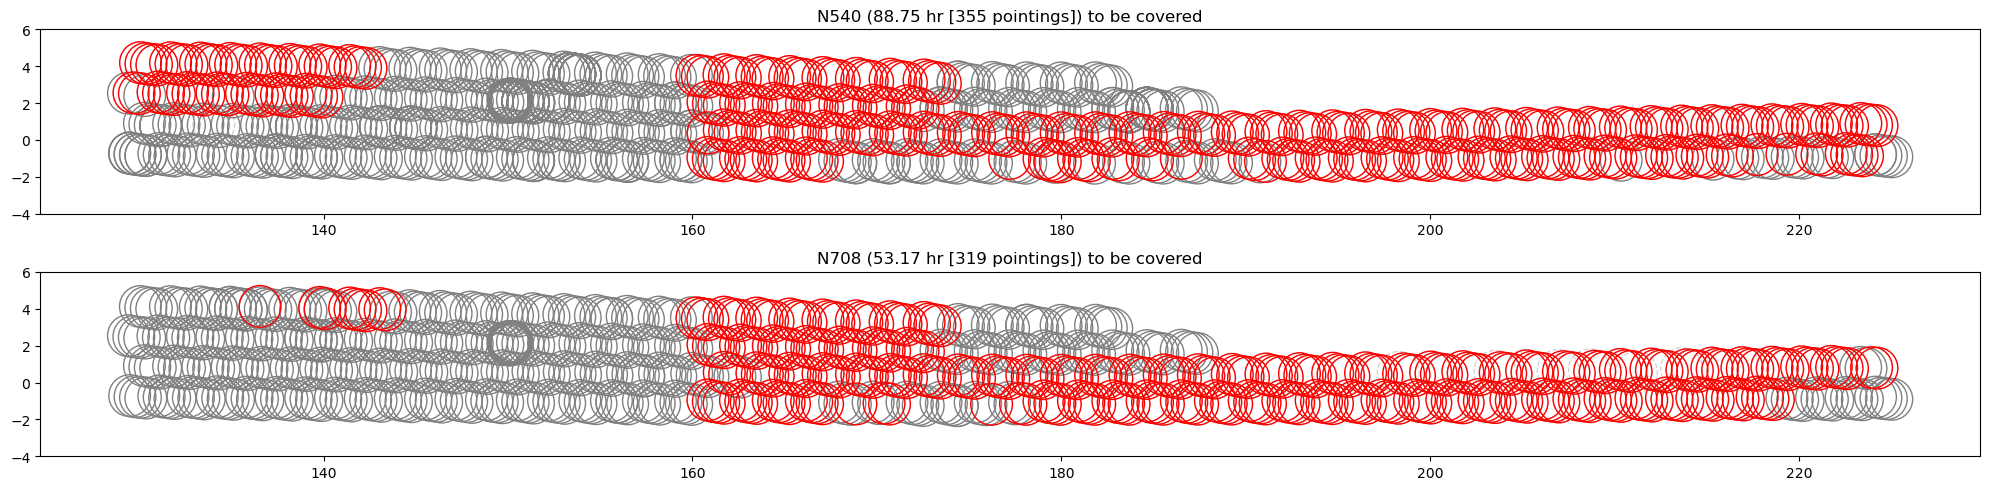

In [362]:
copilots = [coo_o, coo_h]
pointings_l = [oiii_pointings, halpha_pointings]
names = ['N540','N708']
exptimes = np.array([15.,10.])/60.
to_obs_l = [to_obs_oiii, to_obs_halpha]

fig,axarr = plt.subplots(2,1,figsize=(20,5))
#ax = plt.subplot(111)
for idx in range(2):
    ax = axarr[idx]
    copilot = copilots[idx]
    pointings = pointings_l[idx]
    name = names[idx]
    to_obs = to_obs_l[idx]
    
    fields = pointings['object'].str.extract(r'(.*?(?=_))')[0]
    observed = np.in1d(pointings.index, copilot.merian_sidecar['object'])
    assert np.in1d(copilot.merian_sidecar['object'], pointings.index).all()


    ax.set_aspect('equal')
    
    nobs = (~observed).sum() 
    nhr = nobs * exptimes[idx]
    
    
    ax.scatter ( pointings.loc[~observed,'RA'], pointings.loc[~observed,'dec'], facecolor='None', edgecolor='lightgrey', ls='--', s=30**2)
    ax.scatter ( copilot.merian_sidecar['racenter'], copilot.merian_sidecar['deccenter'], 
                 facecolor='None', edgecolor='grey', s=30**2, ls='-' )


    #to_obs['odate'] = to_obs.apply(lambda x: x['qstamp'].split("_")[0], axis=1)
    ax.scatter ( pointings.reindex(to_obs.index)['RA'], pointings.reindex(to_obs.index)['dec'], 
                 facecolor='None', edgecolor='r', s=30**2, lw=1 )
    ax.set_title(f'{name} ({nhr:.2f} hr [{nobs} pointings]) to be covered')
    ax.set_ylim(-4,6)
plt.tight_layout ()
plt.savefig('/Users/kadofong/Downloads/S2023A_perfectweather_prediction.png')

In [258]:
from skipper import observe
from scipy import interpolate
from scipy import optimize
from astropy import time

In [358]:
(88.75 + 53.17)/9

15.76888888888889